In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [12]:
#EPA AQS Data
AQS = pd.read_csv('LA_AQS_2023.csv')
AQS = AQS.rename(columns = {'Parameter Name':'parameter', 'Arithmetic Mean':'mean', 'Date (Local)':'date', 'Duration Description':'duration'})
Oz_AQS = AQS.query('parameter == "Ozone" and duration == "1 HOUR"')
N_AQS = AQS.query('parameter == "Nitrogen dioxide (NO2)" and duration == "1 HOUR" ')

In [13]:
Oz_mean = Oz_AQS["mean"]
Oz_date = Oz_AQS["date"]
N_mean = N_AQS["mean"]
N_date = N_AQS["date"]
oz = pd.DataFrame(data = {"Oz_mean":Oz_mean, 'date':Oz_date})
n = pd.DataFrame(data = {"N_mean":N_mean, 'date':N_date})
oz_n = oz.merge(n, on=['date'])

[Text(0.5, 0, 'Nitrogen Dioxide (ppb)'), Text(0, 0.5, 'Ozone (ppm)')]

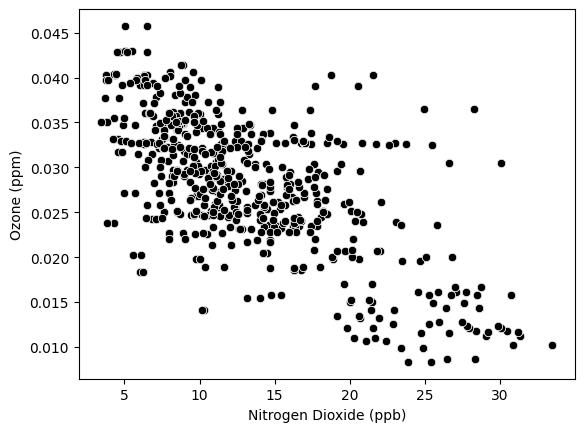

In [14]:
on_s = sns.scatterplot(data=oz_n, x="N_mean", y="Oz_mean", color='black')
on_s.set(xlabel='Nitrogen Dioxide (ppb)', ylabel='Ozone (ppm)')

In [15]:
xVal = np.array(oz_n['N_mean']).reshape((-1,1))
yVal = np.array(oz_n['Oz_mean'])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xVal, yVal, test_size=0.2)

In [17]:
reg2 = linear_model.LinearRegression()
reg2.fit(X_train,y_train)

LinearRegression()

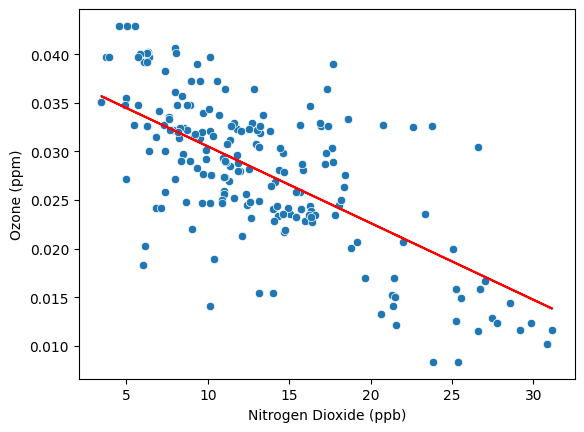

In [18]:
on_test = pd.DataFrame({'N_mean' : X_test.ravel(), 'Oz_mean' : y_test.ravel()})
on_test['yPred'] = reg2.predict(X_test)

on_pred = sns.scatterplot(data=on_test, x="N_mean", y="Oz_mean")
on_pred.set(xlabel='Nitrogen Dioxide (ppb)', ylabel='Ozone (ppm)')
plt.plot(on_test['N_mean'], on_test['yPred'], color='r')

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(on_test['Oz_mean'],on_test['yPred'])

2.913475001737672e-05

2. The MSE of our linear model test is 0.000029 ppm.
3. I think the linear model performs pretty well when predicting Ozone from NO2 concentrations. The MSE is orders of magnitude lower than the spread of our ozone concentrations. 

In [11]:
#Mauna Loa CO2
ml = pd.read_csv('MaunaLoa_CO2.csv')

In [3]:
ml_old = ml.query('year < 2000')
ml_new = ml.query('year >= 2000')

In [4]:
time_old = np.array(ml_old['decimal date']).reshape((-1,1))
CO2_old = np.array(ml_old['average'])
time_new = np.array(ml_new['decimal date']).reshape((-1,1))
CO2_new = np.array(ml_new['average'])

reg = linear_model.LinearRegression()
reg.fit(time_old,CO2_old)

LinearRegression()

In [6]:
co2_test = pd.DataFrame({'decimal date' : time_new.ravel(), 'average' : CO2_new.ravel()})
co2_test['yPred'] = reg.predict(time_new)

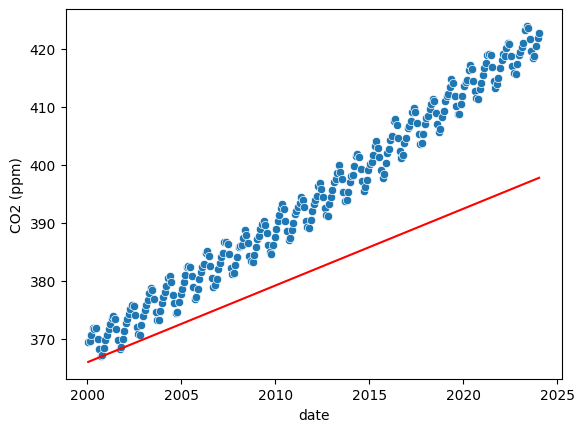

In [7]:
co2_pred = sns.scatterplot(data=ml_new, x="decimal date", y="average")
co2_pred.set(xlabel='date', ylabel='CO2 (ppm)')
plt.plot(co2_test['decimal date'], co2_test['yPred'], color='r')

In [10]:
mean_squared_error(co2_test['average'],co2_test['yPred'])

200.2461711097249

2. The MSE of our linear CO2 model test is 200 ppm
3. The linear regression does not perform well, with the underestimation of CO2 getting worse with an increase in time. This is because CO2 in the atmosphere is increasing exponentially, not linearly. So predicting future increase only on the rate of past increase is going to produce atmospheric concentrations severely below actual values.